##Assignment-5: Practice ML Workflow that involves the following steps: data pre-processing, model training using gradient descent/ascent, addressing an ML challenge of optimization/ selecting the threshold for classification, performance evaluation and re-training using the optimal threshold. You can either use your own Logistic Regression implementation or the one that is provided by Python's library.

**Learning Outcome**: Students will learn the challenge of training, model selection and tuning of hyper-parameter (threshold) using Cross-Validation and Reciever Operating Curve (ROC) techniques. 

P.S: ROC and Cross-Validation topics will be covered in the subsequent lectures, so don't worry if you are unable to complete that part now.



# Implementing Logistics Regression in Python

In logistic regression we perform binary classification of by learnig a function of the form $f_w(x) = \sigma(x^\top w)$. Here $x,w \in \mathbb{R}^D$, where $D$ is the number of features as before. $\sigma(z) = \frac{1}{1+e^{-z}}$ is the logistic function.  Let's plot this function below

Text(0.5, 1.0, 'logistic function')

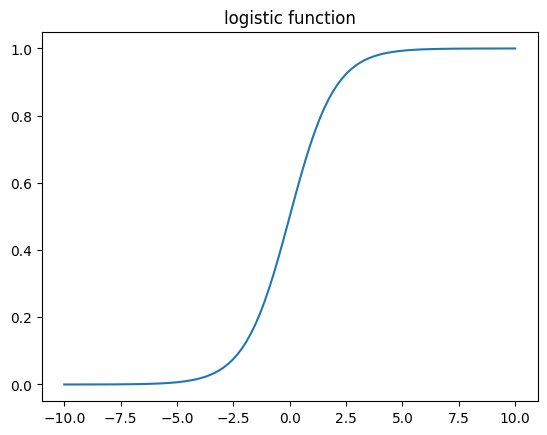

In [4]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function
z = np.linspace(-10,10,100)
plt.plot(z, logistic(z))
plt.title('logistic function')

## Cost function
To fit our model $f_w$ to the data $\mathcal{D} = \{x^{(1)}, \ldots, x^{(N)}\}$, we maximize the **logarithm of the conditional likelihood**:

$$
\ell(w; \mathcal{D}) = \sum_n \log \mathrm{Bernoulli}(y^{(n)} | \sigma({x^{(n)}}^\top w)) = \sum_n y^{(n)} \log \sigma({x^{(n)}}^\top w)) + (1-y^{(n)}) \log (1-\sigma({x^{(n)}}^\top w)))
$$

by substituting the definition of logistic function in the equation above, and minimizing the **negative** of the log-likelihood, which is called the **cost function**,
we get

$$
J(w) = \sum_n y^{(n)} \log(1+e^{-x w^\top}) + (1-y^{(n)}) \log(1+e^{x w^\top})
$$

In practice we use mean rather than sum over data points.

In [5]:
def cost_fn(x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J

## Minimizing the cost using gradient descent
To minimize the cost we use gradient descent: start from some initial assignment to the parameters $w$, and at each iteration take a small step in the opposite direction of the *gradient*. The gradient of the cost function above is given by:

$$
\frac{\partial}{\partial w_d} J(w) =\sum_n - y^{(n)} x^{(n)}_d \frac{e^{-w^\top x^{(n)}}}{1 + e^{-w^\top x^{(n)}}} +x^{(n)}_d (1- y^{(n)}) \frac{e^{w^\top x^{(n)}}}{1 + e^{w^\top x^{(n)}}} = \sum_n - x^{(n)}_d y^{(n)} (1-\hat{y}^{(n)})+ x^{(n)}_d (1- y^{(n)}) \hat{y}^{(n)} = x^{(n)}_d (\hat{y}^{(n)} - y^{(n)}) 
$$
Since in practice we divide the cost by $N$, we have to the same for the gradient; see the implementation below.

fit this linear model to toy data with $x \in \Re^1$ + a bias parameter. Display the data

## Weight vs Cost 
**TASK: Similar to what we did for linear regression, we plot *Cost* as a function of model parameters (weights), and show the correspondence between the different weights having different costs and their fit. Visualize the cost and the fit.**

In [2]:
#Initially loading few Libraries 

import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [49]:
#Reading 
from sklearn import datasets
LoanPrep = pd.read_csv("https://raw.githubusercontent.com/sumonacalpoly/Datasets/main/LoanApproval.csv", index_col=False)

(150, 2)
(150,)


In [48]:
LoanPrep



,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


# Data Cleaning and outlier treatment code goes here...........

# Data preparation steps

In [8]:
#Loading machine learning library from sklearn
from sklearn.model_selection import train_test_split

In [50]:
# Find out columns with missing values
LoanPrep.isnull().sum(axis=0)
# Replace Missing Values. Drop the rows.
LoanPrep = LoanPrep.dropna()

# Drop irrelevant columns based on business sense
LoanPrep = LoanPrep.drop(['gender'], axis=1)

# Create Dummy variables
LoanPrep.dtypes
LoanPrep = pd.get_dummies(LoanPrep, drop_first=True)


# Normalize the data (Income and Loan Amount) Using StandardScaler
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()

LoanPrep['loanamt'] = scalar_.fit_transform(LoanPrep[['income']])
LoanPrep['loanamt'] = scalar_.fit_transform(LoanPrep[['income']])

# Do the same as above for 'loanamt'  



In [124]:
#Separating train and test data
Y = LoanPrep['status_Y']
X = LoanPrep.drop(['status_Y'], axis=1)

print(Y.shape)
print(X.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=1, stratify=Y)



# Split the X and Y dataset into training 80% and testing set 20%
 




(529,)
(529, 4)


# Training the classification model
**Use LogisticRegression class to do the training. Display the confusion matrix for the test set and report the accuracy score on the test set**

In [139]:
# instantiate a logistic regression model, and fit with X and y
# Build the Logistic Regression model
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


# Predict the outcome using Test data
 
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(np.mean(y_test == predictions))
print(score)

# Build the conufsion matrix and get the accuracy/score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)


0.8490566037735849
0.8490566037735849
[[18 15]
 [ 1 72]]


##ML Challenges: Model Selection and Hyper-Parameter Tuning##

**TASK: Use the ROC (Reciever Operating Curve) for finding the optimal threshold value for classification. To do so, use Cross-Validation technqiue on the training subset (80% of the entire dataset) for selecting this threshold.**

-- Then, apply the optimal threshold on a separate dataset known as the test set (the remaining 20%) for reporting the generalization performance. Report the accuracy, and confusion matrix on this generalization set.

37
[1.83604899 0.83604899 0.83374753 0.83224531 0.83207586 0.83126365
 0.8309821  0.82995218 0.82971302 0.82940732 0.82914713 0.8287213
 0.82866503 0.8235456  0.82293383 0.81022376 0.8039913  0.80180337
 0.80133337 0.73237971 0.73228082 0.73063629 0.73051808 0.72919656
 0.72815163 0.726799   0.72664632 0.71617977 0.7157303  0.7045756
 0.15086851 0.14973945 0.14053191 0.10293233 0.08804049 0.08731316
 0.07706216]


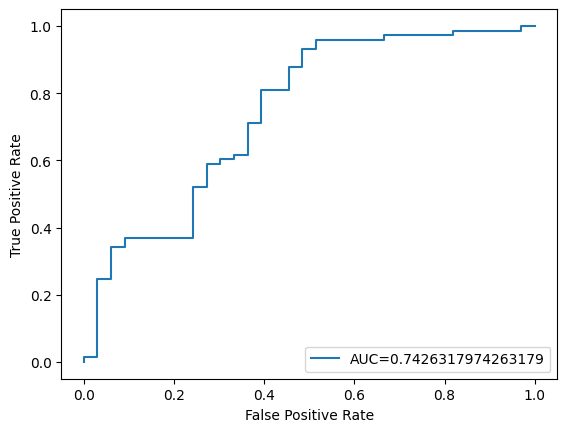

In [110]:
#define metrics
from sklearn import metrics

y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


In [140]:
import operator 
from sklearn.model_selection import KFold


A_train, A_test, A_y_train, A_y_test = train_test_split(X, Y, test_size= 0.2, random_state=1, stratify=Y)

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
inner_results = list()
#kf = KFold(n_splits = 5)
#X_train = X.loc[train_ix]

def y_class(y_hat, threshold):
    return [1 if i > threshold else 0 for i in y_hat]

def accuracy(true_values, predictions):
    return np.mean(true_values == predictions)
 
import warnings
warnings.filterwarnings("ignore")
best_model_params = []
best_model_scores = []
save_best_model = []
li = [i for i in np.arange(0,1,0.1)]

for train_ix, val_ix in cv_outer.split(A_train):
	# split data
	X_train_outer = A_train.iloc[train_ix]   
	X_val_outer = A_train.iloc[val_ix]
	y_train_outer = A_y_train.iloc[train_ix]
	y_val_outer = A_y_train.iloc[val_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=10, shuffle=True, random_state=1)
	# define the model
	model = LogisticRegression()
	# define search space
	
	# define search
	best = 0.0
	best_li = -1
	acs = []
	for thre in li:
		for inner_train_ix, inner_val_ix in cv_inner.split(X_train_outer):
	
			model = LogisticRegression()
			h_X_train_outer = A_train.iloc[inner_train_ix]
			h_X_val_outer = A_train.iloc[inner_val_ix]

			h_y_train_outer = A_y_train.iloc[inner_train_ix]
			h_y_val_outer = A_y_train.iloc[inner_val_ix]


			model.fit(h_X_train_outer, h_y_train_outer)
			y_pred_proba = model.predict_proba(h_X_val_outer)[::,1]

			predictions = y_class(y_pred_proba, thre)
			a = (accuracy(predictions, h_y_val_outer))
			if a > best:
				best = a
				best_li = thre
				print("Accu for Threshold :{t} is {A}".format(t=thre, A=a))

			# score = model.score(h_X_val_outer, predictions)
			# print(score)

print(best_li)

 

Accu for Threshold :0.0 is 0.7105263157894737
Accu for Threshold :0.0 is 0.7368421052631579
Accu for Threshold :0.0 is 0.7894736842105263
Accu for Threshold :0.30000000000000004 is 0.868421052631579
Accu for Threshold :0.0 is 0.7105263157894737
Accu for Threshold :0.0 is 0.7368421052631579
Accu for Threshold :0.0 is 0.7894736842105263
Accu for Threshold :0.30000000000000004 is 0.868421052631579
Accu for Threshold :0.0 is 0.7105263157894737
Accu for Threshold :0.0 is 0.7368421052631579
Accu for Threshold :0.0 is 0.7894736842105263
Accu for Threshold :0.30000000000000004 is 0.868421052631579
Accu for Threshold :0.0 is 0.7435897435897436
Accu for Threshold :0.0 is 0.7631578947368421
Accu for Threshold :0.2 is 0.8157894736842105
Accu for Threshold :0.30000000000000004 is 0.8947368421052632
Accu for Threshold :0.0 is 0.7435897435897436
Accu for Threshold :0.0 is 0.7631578947368421
Accu for Threshold :0.2 is 0.8157894736842105
Accu for Threshold :0.30000000000000004 is 0.8947368421052632
Acc

In [138]:
logisticRegr = LogisticRegression()
logisticRegr.fit(A_train, A_y_train)

y_pred_proba = logisticRegr.predict_proba(A_test)
y_pred_proba = y_pred_proba[::,1]

predictions = y_class(y_pred_proba, best_li)
a = (accuracy(predictions, A_y_test))


print(a)

# Build the conufsion matrix and get the accuracy/score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(A_y_test, predictions)
print(cm)



0.8490566037735849
[[18 15]
 [ 1 72]]


In [ ]:
import operator 
from sklearn.model_selection import KFold

X = [1, 2, 3, 4]
Y = [1, 0, 1, 1]


A_train, A_test, A_y_train, A_y_test = train_test_split(X, Y, test_size= 0.2, random_state=1, stratify=Y)

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
inner_results = list()
#kf = KFold(n_splits = 5)
#X_train = X.loc[train_ix]

def y_class(y_hat, threshold):
    return [1 if i > threshold else 0 for i in y_hat]

def accuracy(true_values, predictions):
    return np.mean(true_values == predictions)
 
import warnings
warnings.filterwarnings("ignore")
best_model_params = []
best_model_scores = []
save_best_model = []
li = [i for i in np.arange(0,1,0.1)]

for train_ix, val_ix in cv_outer.split(A_train):
	# split data
	X_train_outer = A_train.iloc[train_ix]   
	X_val_outer = A_train.iloc[val_ix]
	y_train_outer = A_y_train.iloc[train_ix]
	y_val_outer = A_y_train.iloc[val_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=10, shuffle=True, random_state=1)
	# define the model
	model = LogisticRegression()
	# define search space
	
	# define search
	best = 0.0
	best_li = -1
	acs = []
	for thre in li:
		for inner_train_ix, inner_val_ix in cv_inner.split(X_train_outer):
	
			model = LogisticRegression()
			h_X_train_outer = A_train.iloc[inner_train_ix]
			h_X_val_outer = A_train.iloc[inner_val_ix]

			h_y_train_outer = A_y_train.iloc[inner_train_ix]
			h_y_val_outer = A_y_train.iloc[inner_val_ix]


			model.fit(h_X_train_outer, h_y_train_outer)
			y_pred_proba = model.predict_proba(h_X_val_outer)[::,1]

			predictions = y_class(y_pred_proba, thre)
			a = (accuracy(predictions, h_y_val_outer))
			if a > best:
				best = a
				best_li = thre
				print("Accu for Threshold :{t} is {A}".format(t=thre, A=a))

			# score = model.score(h_X_val_outer, predictions)
			# print(score)

print(best_li)

 